In [ ]:
import sys
sys.path.append('./../../')
sys.path.append('./../../designer/script/')

from tmm.get_jacobi_n_adjoint import get_jacobi_free_form
from film import TwoMaterialFilm, FreeFormFilm, BaseFilm
from design import DesignForFilm

from optimizer.adam import adam_optimize

import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

inc_ang = 0.
wls = np.linspace(500, 1000, 500)

#  make target film
np.random.seed(1)
d = np.random.random(10)
d *= 1000. / d.sum()
target_film = TwoMaterialFilm('1', '2', 'SiO2', d)
target_film.add_spec_param(inc_ang, wls)


In [ ]:
# thickness gd
np.random.seed(42)
init_layers = 100
d = np.random.random(init_layers)
d = d * 1000 / d.sum() # total gd = 1000 nm
rand_2m_gd_film = TwoMaterialFilm('1', '2', 'SiO2', d)
design = DesignForFilm(target_film, rand_2m_gd_film)

design.adam_gd(4000, record=True, show=True, alpha=0.1)


In [ ]:

# free form gd
np.random.seed(42)
n = np.random.random(1000) + 1 # in (1, 2)
free_film = FreeFormFilm(n, 1000, 'SiO2')

def gd(target_film: BaseFilm, film: FreeFormFilm):
    losses, films = adam_optimize(film, target_film.get_all_spec_list(), 1000, 0.1, record=True, show=True)

gd(target_film, free_film)

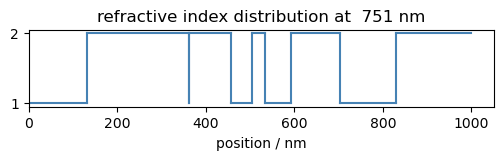

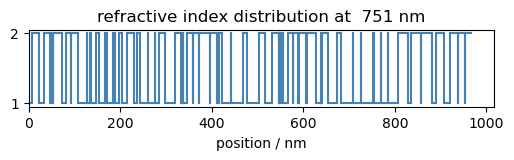

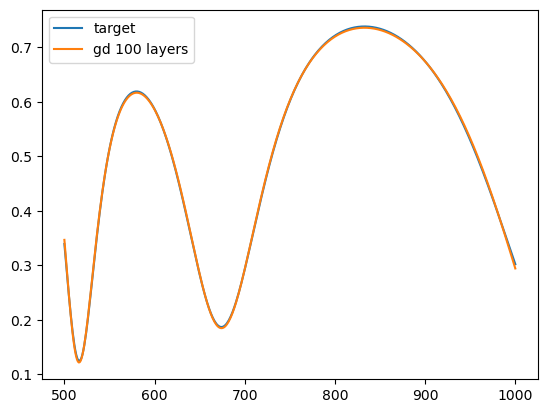

In [13]:
sys.path.append('./..')
from analyze_utils.structure import plot_layer_thickness, diff_simple_film

plot_layer_thickness(target_film)
plot_layer_thickness(rand_2m_gd_film)


fig, ax = plt.subplots(1, 1)
ax.plot(wls, target_film.get_spec().get_R(), label='target')
ax.plot(wls, rand_2m_gd_film.get_spec(inc_ang, wls).get_R(), label='gd 100 layers')
ax.legend()